In [1]:
import numpy as np # Library yang berfungsi untuk mengolah data berbentuk array dengan metode komputasi ilmiah.
import sympy as smp # Library yang digunakan untuk matematika simbolis. 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
# Menentukan variabel yang diperlukan untuk sympy.
t, m, g, L1, L2, w, C, alph, beta = smp.symbols(r't m g L_1, L_2 \omega C \alpha \beta')

In [3]:
# Menentukan θ_1(t) dan θ_2(t) dan nyatakan fungsi waktu. Dari sini dapatkan juga turunan pertama dan kedua.
the1, the2, =  smp.symbols(r'\theta_1, \theta_2 ', cls=smp.Function)

the1 = the1(t)
the1_d = smp.diff(the1, t)
the1_dd = smp.diff(the1_d, t)

the2 = the2(t)
the2_d = smp.diff(the2, t)
the2_dd = smp.diff(smp.diff(the2, t), t)

In [4]:
# Mendefinisikan x_1(θ_1), y_1(θ_1) dan x_2(θ_1,θ_2), y_2(θ_1,θ_2).
x1, y1, x2, y2 = smp.symbols('x_1, y_1, x_2, y_2', cls=smp.Function)
x1= x1(t, the1)
y1= y1(t, the1)
x2= x2(t, the1, the2)
y2= y2(t, the1, the2)

In [5]:
# Masukkan ke dalam bentuk fungsional spesifik x1, y1, x2, y2
x1 = smp.cos(w*t)+L1*smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = smp.cos(w*t)+L1*smp.sin(the1) + L2*smp.sin(the2)
y2 = -L1*smp.cos(the1) -L2*smp.cos(the2)

In [6]:
# Menentukan fungsi numerik untuk Vx1, Vy1, Vx2, Vy2. 
smp.diff(x1, t)

vx1_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(x1, t))
vx2_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(x2, t))
vy1_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(y1, t))
vy2_f = smp.lambdify((t,w,L1,L2,the1,the2,the1_d,the2_d), smp.diff(y2, t))

In [7]:
# Menentukan Energi Kinetik T, energi potensial V, dan untuk Pers. Lagrange nya L = T - V
T = 1/2 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2) + \
    1/2 * m  *(smp.diff(x2, t)**2 + + smp.diff(y2, t)**2)
V = g*y1 + m*g*y2
L = T-V

In [8]:
# Untuk menyelesaikan Pers. Lagrange
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)
LE1 = LE1.simplify()

LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)
LE2 = LE2.simplify()

In [9]:
LE1

1.0*L_1*(-L_1*m*Derivative(\theta_1(t), (t, 2)) - L_1*Derivative(\theta_1(t), (t, 2)) - L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - L_2*m*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t)) + \omega**2*cos(\omega*t)*cos(\theta_1(t)) - g*m*sin(\theta_1(t)) - g*sin(\theta_1(t)))

In [10]:
LE2

1.0*L_2*m*(L_1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - L_1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - L_2*Derivative(\theta_2(t), (t, 2)) + \omega**2*cos(\omega*t)*cos(\theta_2(t)) - g*sin(\theta_2(t)))

In [11]:
# Karena keduanya sama dengan nol dan linier dalam ∂_t^2 θ_1 dan ∂_t^2 θ_2, kita bisa menyelesaikan semuanya dalam ∂_t^2 θ_1 dan ∂_t^2 θ_2 (ini memberi dua ODE orde kedua yang digabungkan).
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=False, rational=False)

sols[the1_dd] #d^2 / dt^2 theta_1

L_1*m*sin(\theta_1(t) - \theta_2(t))*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t) - \theta_2(t))*cos(\theta_2(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - \omega**2*m*cos(\omega*t)*cos(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - \omega**2*cos(\omega*t)*cos(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + g*m*sin(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) - g*m*sin(\theta_2(t))*cos(\theta_1(t) - \theta_2(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1) + g*sin(\theta_1(t))/(L_1*m*cos(\theta_1(t) - \theta_2(t))**2 - L_1*m - L_1)

In [12]:
LE1

1.0*L_1*(-L_1*m*Derivative(\theta_1(t), (t, 2)) - L_1*Derivative(\theta_1(t), (t, 2)) - L_2*m*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - L_2*m*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + \omega**2*m*cos(\omega*t)*cos(\theta_1(t)) + \omega**2*cos(\omega*t)*cos(\theta_1(t)) - g*m*sin(\theta_1(t)) - g*sin(\theta_1(t)))

In [13]:
a = LE1.subs([(smp.sin(the1-the2), the1-the2),
         (smp.cos(the1-the2), 1),
         (smp.cos(the1), 1),
         (smp.sin(the1), the1),
         (the1, C*smp.cos(w*t)),
         (the2, C*alph*smp.cos(w*t)),
         (m, 1),
         (L2, L1),
         ]).doit().series(C, 0, 2).removeO().simplify()

In [14]:
b = LE2.subs([(smp.sin(the1-the2), the1-the2),
         (smp.cos(the1-the2), 1),
         (smp.cos(the1), 1),
         (smp.cos(the2), 1),
         (smp.sin(the1), the1),
         (smp.sin(the2), the2), 
         (the1, C*smp.cos(w*t)),
         (the2, C*alph*smp.cos(w*t)),
         (m, 1),
         (L2, L1),
         ]).doit().series(C, 0, 2).removeO().simplify()

In [15]:
yeet = smp.solve([a.args[1], b.args[2]], (w, alph))

In [16]:
yeet[2][0]

-sqrt(-C*g*(-2.0 + 1.4142135623731*(C**2*L_1**2 + C*L_1 + 0.5)**0.5/(C*L_1) - 1/(C*L_1))/(C*L_1 + 1.0))

In [17]:
# Mengatur β=CL_1 dan ambil batas limitnya sebagai β mendekati ∞
yeet[0][0]

-sqrt(-C*g*(-2.0 - 1.4142135623731*(C**2*L_1**2 + C*L_1 + 0.5)**0.5/(C*L_1) - 1/(C*L_1))/(C*L_1 + 1.0))

In [18]:
smp.limit(yeet[1][0].subs(C, beta/L1).simplify(), beta, smp.oo)

1.84775906502257*sqrt(g/L_1)

In [19]:
# Mengubah persamaan eksak da memasukkan kedalam persamaan numerik.
dz1dt_f = smp.lambdify((t, m, g, w, L1, L2, the1, the2, the1_d, the2_d), sols[the1_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)

dz2dt_f = smp.lambdify((t, m, g, w, L1, L2, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe2dt_f = smp.lambdify(the2_d, the2_d)


In [20]:
# Mendefinisikan persamaan diferensial fungsi S.
def dSdt(S, t):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, m, g, w, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, m, g, w, L1, L2, the1, the2, z1, z2),
    ]

In [21]:
# Menambahkan contoh fungsi numerik untuk menambahkan nilai.
t = np.linspace(0, 20, 1000)
g = 9.81
m=1
L1 = 20
L2 = 20
w = np.sqrt(g/L1)
ans = odeint(dSdt, y0=[0, 0, 0, 0], t=t)

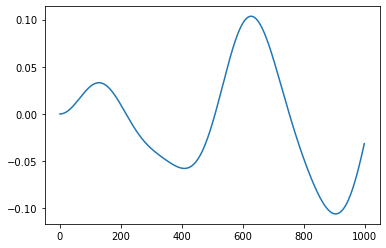

In [22]:
plt.plot(ans.T[0])

In [23]:
# Membuat persamaan energi kinetik
def get_energy(w):
    t = np.linspace(0, 100, 2000)
    ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)
    vx1 = vx1_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3]) 
    vx2 = vx2_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vy1 = vy1_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    vy2 = vy2_f(t,w,L1,L2,ans.T[0],ans.T[2],ans.T[1],ans.T[3])
    E = 1/2 * np.mean(vx1**2+vx2**2+vy1**2+vy2**2)
    return E

In [24]:
ws = np.linspace(0.4, 1.3, 100)
Es = np.vectorize(get_energy)(ws)

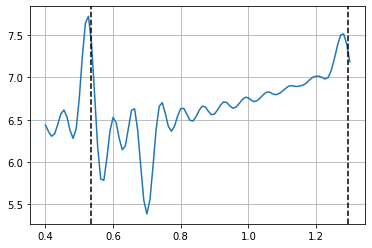

In [25]:
plt.plot(ws, Es)
plt.axvline(1.84775*np.sqrt(g/L1), c='k', ls='--')
plt.axvline(0.76536*np.sqrt(g/L1), c='k', ls='--')
# Tautochrone
#plt.axvline(np.sqrt(np.pi*g**(-1/2)), c='k', ls='--')
plt.grid()

In [26]:
t = np.linspace(0, 200, 20000)
g = 9.81
m=1
L1 = 20
L2 = 20
w = ws[ws>1][np.argmax(Es[ws>1])]
ans = odeint(dSdt, y0=[0.1, 0.1, 0, 0], t=t)

In [27]:
def get_x0y0x1y1x2y2(t, the1, the2, L1, L2):
    return (np.cos(w*t),
            0*t,
            np.cos(w*t) + L1*np.sin(the1),
            -L1*np.cos(the1),
            np.cos(w*t) + L1*np.sin(the1) + L2*np.sin(the2),
            -L1*np.cos(the1) - L2*np.cos(the2),
    )

In [28]:
x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(t, ans.T[0], ans.T[2], L1, L2)

In [29]:
def animate(i):
    ln1.set_data([x0[::10][i], x1[::10][i], x2[::10][i]], [y0[::10][i], y1[::10][i], y2[::10][i]])
    trail1 = 50            # length of motion trail of weight 1 
    trail2 = 50            # length of motion trail of weight 2
    ln2.set_data(x1[::10][i:max(1,i-trail1):-1], y1[::10][i:max(1,i-trail1):-1])   # marker + line of first weight
    ln3.set_data(x2[::10][i:max(1,i-trail2):-1], y2[::10][i:max(1,i-trail2):-1])   # marker + line of the second weight

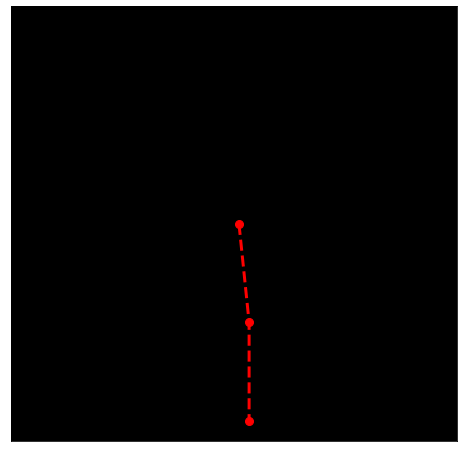

In [49]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = ax.plot([], [], 'ro-',markersize = 8, alpha=0.05, color='cyan')   # line for Earth
ln3, = ax.plot([], [], 'ro-',markersize = 8,alpha=0.05, color='cyan')
ax.set_ylim(-44,44)
ax.set_xlim(-44,44)

ani = animation.FuncAnimation(fig, animate, frames=2000, interval=50)
ani.save('pendulum kelompok 3.gif',writer='pillow',fps=50)